In [2]:
import numpy as np
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
import tensorboard
from keras.optimizers import SGD
import keras.backend as K

/home/adrien/anaconda3/envs/GPI770/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/adrien/anaconda3/envs/GPI770/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/adrien/anaconda3/envs/GPI770/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/adrien/anaconda3/envs/GPI770/lib/python3

In [15]:
def read_csv(url):
    """
    Args:
        url (string): the url of the file
    Returns:
        df: the dataframe filled
    """
    df = pd.read_csv(url, header=None)
    df.head()
    return df

In [16]:
music_class_binary = {'BIG_BAND':[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
          'BLUES_CONTEMPORARY':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
          'COUNTRY_TRADITIONAL': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
          'DANCE':               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
          'ELECTRONICA':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
          'EXPERIMENTAL':        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
          'FOLK_INTERNATIONAL':  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
          'GOSPEL':              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
          'GRUNGE_EMO':          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
          'HIP_HOP_RAP':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'JAZZ_CLASSIC':        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_ALTERNATIVE':   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_DEATH':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'METAL_HEAVY':         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_CONTEMPORARY':    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_INDIE':           [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'POP_LATIN':           [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'PUNK':                [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'REGGAE':              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'RNB_SOUL':            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_ALTERNATIVE':    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_COLLEGE':        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_CONTEMPORARY':   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_HARD':           [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
          'ROCK_NEO_PSYCHEDELIA':[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [31]:
music_class = {'BIG_BAND':1,
          'BLUES_CONTEMPORARY':2,
          'COUNTRY_TRADITIONAL':3,
          'DANCE':4,
          'ELECTRONICA':5,
          'EXPERIMENTAL':6,
          'FOLK_INTERNATIONAL':7,
          'GOSPEL':8,
          'GRUNGE_EMO':9,
          'HIP_HOP_RAP':10,
          'JAZZ_CLASSIC':11,
          'METAL_ALTERNATIVE':12,
          'METAL_DEATH':13,
          'METAL_HEAVY':14,
          'POP_CONTEMPORARY':15,
          'POP_INDIE':16,
          'POP_LATIN':17,
          'PUNK':18,
          'REGGAE':19,
          'RNB_SOUL':20,
          'ROCK_ALTERNATIVE':21,
          'ROCK_COLLEGE':22,
          'ROCK_CONTEMPORARY':23,
          'ROCK_HARD':24,
          'ROCK_NEO_PSYCHEDELIA':25}

In [18]:
#Custom metrics function to calculate the F1 score
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [22]:
def CreateMultiPerceptron(nb_layers,nb_perceptron,nb_iteration,learning_rate,nb_essai,path):
    
    
    #Extraire les données des ensembles 
    dataset = read_csv(path)
    dataset.head()
    print(dataset.shape[1])
    labels = dataset.loc[:,dataset.columns == (dataset.shape[1]-1)]
    labels = labels.to_numpy()
    y = []
    for e in labels:
        y.append(music_class_binary[e[0]])
    
    dataset = dataset.drop([0,1,(dataset.shape[1]-1)],axis=1)
    
    X = dataset.to_numpy()
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

    # scale the data : réduire le execution time
    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_val = scaling.transform(X_val)
    X_test = scaling.transform(X_test)
    
    
    #Create the model 
    model = Sequential()
    #First hidden layer with specified number of percpetrons 
    model.add(Dense(units=nb_perceptron, activation='relu', input_dim = X_train.shape[1]))
    
    for i in range(nb_layers-1):
        #Next hidden layers with specified number of percpetrons 
        model.add(Dense(units=nb_perceptron, activation='relu'))
    
    #Last layer, the activation layer with 2 outputs
    model.add(Dense(units = 25, activation='softmax'))
    
    #Compile the model
    sgd = SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy',f1])
    
    #3. Entraîner 
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=nb_iteration, batch_size=100)
    
    # Plot training & validation accuracy values
    accuracy = pd.DataFrame(history.history['accuracy'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    print("Accuracy")
    print(accuracy.head(nb_iteration))
    
    # Plot training & validation loss values
    f1score = pd.DataFrame(history.history['f1'])
    plt.plot(history.history['f1'])
    plt.plot(history.history['val_f1'])
    plt.title('Model F1 score')
    plt.ylabel('F1 score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    print("F1 score")
    print(f1score.head(nb_iteration))
    
    
    #4 Evaluer le modèle
    score = model.evaluate(X_test, y_test)
    print("---TEST---")
    print(score)

13
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.8506 - accuracy: 0.1451 - f1: 2.4107e-04 - val_loss: 2.7979 - val_accuracy: 0.1559 - val_f1: 0.0000e+00
Epoch 2/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.7694 - accuracy: 0.1663 - f1: 0.0022 - val_loss: 2.7492 - val_accuracy: 0.1694 - val_f1: 0.0023
Epoch 3/100
114915/114915 [==============================] - 3s 29us/step - loss: 2.7351 - accuracy: 0.1751 - f1: 0.0050 - val_loss: 2.7241 - val_accuracy: 0.1784 - val_f1: 0.0057
Epoch 4/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.7164 - accuracy: 0.1813 - f1: 0.0071 - val_loss: 2.6986 - val_accuracy: 0.1846 - val_f1: 0.0125
Epoch 5/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.7028 - accuracy: 0.1849 - f1: 0.0115 - val_loss: 2.7036 - val_accuracy: 0.1834 - val_f1: 0.0120
Epoch 6/100
114915/114915 [===========

Epoch 46/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5637 - accuracy: 0.2187 - f1: 0.0437 - val_loss: 2.6338 - val_accuracy: 0.2049 - val_f1: 0.0326
Epoch 47/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5621 - accuracy: 0.2191 - f1: 0.0440 - val_loss: 2.6335 - val_accuracy: 0.2001 - val_f1: 0.0452
Epoch 48/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5599 - accuracy: 0.2200 - f1: 0.0447 - val_loss: 2.6425 - val_accuracy: 0.2016 - val_f1: 0.0396
Epoch 49/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5580 - accuracy: 0.2210 - f1: 0.0458 - val_loss: 2.6416 - val_accuracy: 0.1996 - val_f1: 0.0383
Epoch 50/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5566 - accuracy: 0.2204 - f1: 0.0461 - val_loss: 2.6401 - val_accuracy: 0.2014 - val_f1: 0.0366
Epoch 51/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5555 - acc

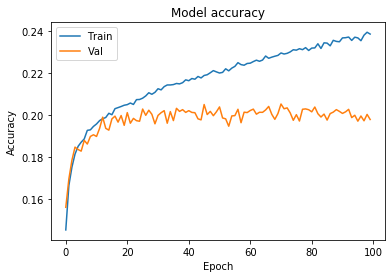

Accuracy
           0
0   0.145125
1   0.166288
2   0.175077
3   0.181256
4   0.184937
..       ...
95  0.236627
96  0.235296
97  0.237932
98  0.239325
99  0.238455

[100 rows x 1 columns]


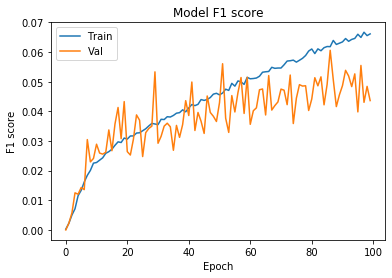

F1 score
           0
0   0.000241
1   0.002245
2   0.005036
3   0.007135
4   0.011537
..       ...
95  0.066033
96  0.064961
97  0.066709
98  0.065573
99  0.066152

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 19us/step
---TEST---
[2.689581440324383, 0.19910334050655365, 0.040247317403554916]


In [23]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,1,"../music/music/tagged_feature_sets/msd-jmirmoments_dev/msd-jmirmoments_dev.csv") 

423
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 33us/step - loss: 3.0039 - accuracy: 0.1171 - f1: 0.0252 - val_loss: 2.9184 - val_accuracy: 0.1464 - val_f1: 0.0342
Epoch 2/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.8720 - accuracy: 0.1530 - f1: 0.0464 - val_loss: 2.8442 - val_accuracy: 0.1578 - val_f1: 0.0545
Epoch 3/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.8114 - accuracy: 0.1673 - f1: 0.0532 - val_loss: 2.8555 - val_accuracy: 0.1592 - val_f1: 0.0592
Epoch 4/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.7871 - accuracy: 0.1731 - f1: 0.0552 - val_loss: 2.7674 - val_accuracy: 0.1760 - val_f1: 0.0550
Epoch 5/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.7728 - accuracy: 0.1752 - f1: 0.0561 - val_loss: 2.8712 - val_accuracy: 0.1523 - val_f1: 0.0525
Epoch 6/100
114915/114915 [==================

114915/114915 [==============================] - 5s 41us/step - loss: 2.5997 - accuracy: 0.2147 - f1: 0.0814 - val_loss: 2.6546 - val_accuracy: 0.2064 - val_f1: 0.0734
Epoch 47/100
114915/114915 [==============================] - 5s 47us/step - loss: 2.5973 - accuracy: 0.2162 - f1: 0.0809 - val_loss: 2.6731 - val_accuracy: 0.2013 - val_f1: 0.0747
Epoch 48/100
114915/114915 [==============================] - 5s 44us/step - loss: 2.5949 - accuracy: 0.2176 - f1: 0.0822 - val_loss: 2.6765 - val_accuracy: 0.1964 - val_f1: 0.0728
Epoch 49/100
114915/114915 [==============================] - 5s 44us/step - loss: 2.5928 - accuracy: 0.2182 - f1: 0.0837 - val_loss: 2.6506 - val_accuracy: 0.2069 - val_f1: 0.0858
Epoch 50/100
114915/114915 [==============================] - 5s 44us/step - loss: 2.5891 - accuracy: 0.2188 - f1: 0.0839 - val_loss: 2.6409 - val_accuracy: 0.2095 - val_f1: 0.0759
Epoch 51/100
114915/114915 [==============================] - 6s 48us/step - loss: 2.5901 - accuracy: 0.2192

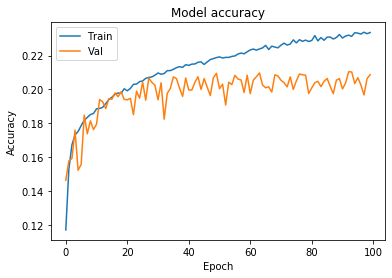

Accuracy
           0
0   0.117087
1   0.153009
2   0.167315
3   0.173128
4   0.175164
..       ...
95  0.233225
96  0.232676
97  0.233747
98  0.232894
99  0.233590

[100 rows x 1 columns]


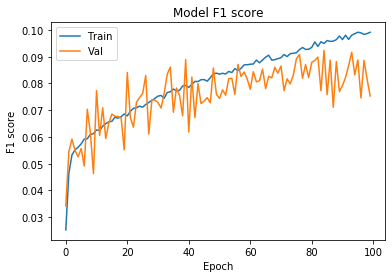

F1 score
           0
0   0.025219
1   0.046423
2   0.053235
3   0.055165
4   0.056128
..       ...
95  0.099158
96  0.098936
97  0.098323
98  0.098655
99  0.099150

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 33us/step
---TEST---
[2.6538671229716937, 0.2075130194425583, 0.07271817326545715]


In [24]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,2,"../music/music/tagged_feature_sets/msd-mvd_dev/msd-mvd_dev.csv") 

171
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.7175 - accuracy: 0.1746 - f1: 0.0203 - val_loss: 2.5917 - val_accuracy: 0.2115 - val_f1: 0.0265
Epoch 2/100
114915/114915 [==============================] - 4s 33us/step - loss: 2.5709 - accuracy: 0.2128 - f1: 0.0448 - val_loss: 2.5426 - val_accuracy: 0.2178 - val_f1: 0.0449
Epoch 3/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.5284 - accuracy: 0.2255 - f1: 0.0561 - val_loss: 2.5072 - val_accuracy: 0.2326 - val_f1: 0.0830
Epoch 4/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.5002 - accuracy: 0.2340 - f1: 0.0647 - val_loss: 2.5602 - val_accuracy: 0.2184 - val_f1: 0.0610
Epoch 5/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.4828 - accuracy: 0.2386 - f1: 0.0702 - val_loss: 2.4880 - val_accuracy: 0.2373 - val_f1: 0.0685
Epoch 6/100
114915/114915 [==================

114915/114915 [==============================] - 3s 25us/step - loss: 2.2566 - accuracy: 0.3007 - f1: 0.1484 - val_loss: 2.3885 - val_accuracy: 0.2738 - val_f1: 0.1565
Epoch 47/100
114915/114915 [==============================] - 4s 34us/step - loss: 2.2569 - accuracy: 0.3020 - f1: 0.1517 - val_loss: 2.3843 - val_accuracy: 0.2734 - val_f1: 0.1206
Epoch 48/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.2533 - accuracy: 0.3020 - f1: 0.1514 - val_loss: 2.3603 - val_accuracy: 0.2815 - val_f1: 0.1417
Epoch 49/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.2504 - accuracy: 0.3019 - f1: 0.1512 - val_loss: 2.3879 - val_accuracy: 0.2715 - val_f1: 0.1460
Epoch 50/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.2480 - accuracy: 0.3033 - f1: 0.1537 - val_loss: 2.3696 - val_accuracy: 0.2794 - val_f1: 0.1460
Epoch 51/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.2461 - accuracy: 0.3054

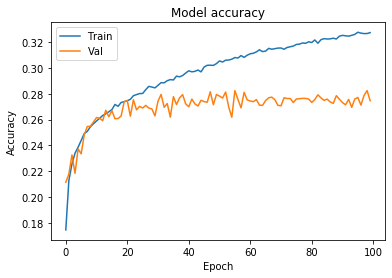

Accuracy
           0
0   0.174607
1   0.212836
2   0.225506
3   0.233964
4   0.238594
..       ...
95  0.327564
96  0.326885
97  0.326520
98  0.326563
99  0.327277

[100 rows x 1 columns]


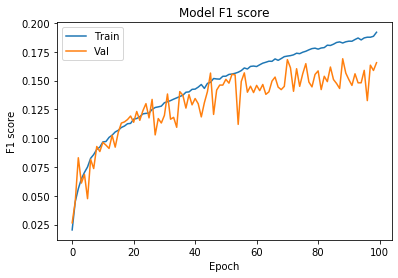

F1 score
           0
0   0.020336
1   0.044847
2   0.056053
3   0.064660
4   0.070249
..       ...
95  0.186976
96  0.187588
97  0.187570
98  0.188373
99  0.191892

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 19us/step
---TEST---
[2.414639419171018, 0.27643340826034546, 0.16111895442008972]


In [25]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,3,"../music/music/tagged_feature_sets/msd-ssd_dev/msd-ssd_dev.csv") 

19
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.8474 - accuracy: 0.1403 - f1: 0.0065 - val_loss: 2.7813 - val_accuracy: 0.1621 - val_f1: 0.0031
Epoch 2/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.7527 - accuracy: 0.1634 - f1: 0.0110 - val_loss: 2.7605 - val_accuracy: 0.1709 - val_f1: 0.0147
Epoch 3/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.7127 - accuracy: 0.1758 - f1: 0.0162 - val_loss: 2.7265 - val_accuracy: 0.1742 - val_f1: 0.0081
Epoch 4/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.6863 - accuracy: 0.1820 - f1: 0.0200 - val_loss: 2.6698 - val_accuracy: 0.1863 - val_f1: 0.0316
Epoch 5/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.6725 - accuracy: 0.1851 - f1: 0.0225 - val_loss: 2.6920 - val_accuracy: 0.1847 - val_f1: 0.0241
Epoch 6/100
114915/114915 [===================

114915/114915 [==============================] - 3s 25us/step - loss: 2.5163 - accuracy: 0.2283 - f1: 0.0596 - val_loss: 2.5988 - val_accuracy: 0.2093 - val_f1: 0.0603
Epoch 47/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.5172 - accuracy: 0.2287 - f1: 0.0591 - val_loss: 2.5976 - val_accuracy: 0.2113 - val_f1: 0.0518
Epoch 48/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.5120 - accuracy: 0.2286 - f1: 0.0603 - val_loss: 2.6141 - val_accuracy: 0.2071 - val_f1: 0.0516
Epoch 49/100
114915/114915 [==============================] - 3s 28us/step - loss: 2.5099 - accuracy: 0.2297 - f1: 0.0624 - val_loss: 2.5890 - val_accuracy: 0.2093 - val_f1: 0.0544
Epoch 50/100
114915/114915 [==============================] - 3s 30us/step - loss: 2.5087 - accuracy: 0.2302 - f1: 0.0631 - val_loss: 2.5915 - val_accuracy: 0.2130 - val_f1: 0.0526
Epoch 51/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.5095 - accuracy: 0.2289

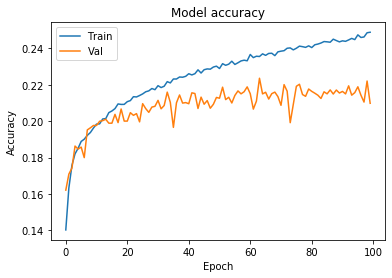

Accuracy
           0
0   0.140295
1   0.163364
2   0.175773
3   0.182048
4   0.185102
..       ...
95  0.247392
96  0.245956
97  0.246225
98  0.248549
99  0.248827

[100 rows x 1 columns]


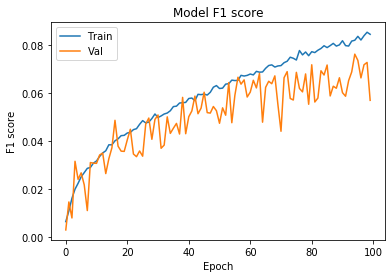

F1 score
           0
0   0.006537
1   0.010983
2   0.016237
3   0.020011
4   0.022454
..       ...
95  0.083538
96  0.082011
97  0.083795
98  0.085242
99  0.084386

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 17us/step
---TEST---
[2.618414194660708, 0.21040906012058258, 0.05853619426488876]


In [26]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,4,"../music/music/tagged_feature_sets/msd-jmirspectral_dev/msd-jmirspectral_dev.csv") 

29
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.8300 - accuracy: 0.1464 - f1: 0.0022 - val_loss: 2.7175 - val_accuracy: 0.1713 - val_f1: 0.0052
Epoch 2/100
114915/114915 [==============================] - 3s 22us/step - loss: 2.6924 - accuracy: 0.1821 - f1: 0.0129 - val_loss: 2.7453 - val_accuracy: 0.1720 - val_f1: 0.0299
Epoch 3/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.6467 - accuracy: 0.1984 - f1: 0.0262 - val_loss: 2.6125 - val_accuracy: 0.2085 - val_f1: 0.0425
Epoch 4/100
114915/114915 [==============================] - 3s 23us/step - loss: 2.6175 - accuracy: 0.2074 - f1: 0.0357 - val_loss: 2.6009 - val_accuracy: 0.2081 - val_f1: 0.0440
Epoch 5/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.5978 - accuracy: 0.2119 - f1: 0.0414 - val_loss: 2.5930 - val_accuracy: 0.2112 - val_f1: 0.0488
Epoch 6/100
114915/114915 [===================

114915/114915 [==============================] - 2s 21us/step - loss: 2.3921 - accuracy: 0.2664 - f1: 0.0999 - val_loss: 2.4987 - val_accuracy: 0.2406 - val_f1: 0.0942
Epoch 47/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.3875 - accuracy: 0.2687 - f1: 0.1028 - val_loss: 2.4865 - val_accuracy: 0.2471 - val_f1: 0.0935
Epoch 48/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.3845 - accuracy: 0.2688 - f1: 0.1029 - val_loss: 2.4997 - val_accuracy: 0.2443 - val_f1: 0.0832
Epoch 49/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.3824 - accuracy: 0.2697 - f1: 0.1035 - val_loss: 2.4982 - val_accuracy: 0.2419 - val_f1: 0.0887
Epoch 50/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.3833 - accuracy: 0.2707 - f1: 0.1047 - val_loss: 2.5268 - val_accuracy: 0.2402 - val_f1: 0.0794
Epoch 51/100
114915/114915 [==============================] - 2s 21us/step - loss: 2.3784 - accuracy: 0.2712

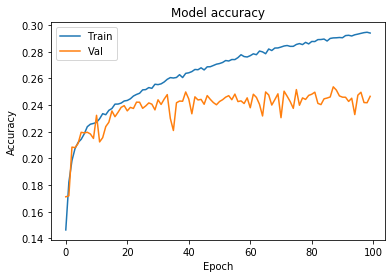

Accuracy
           0
0   0.146421
1   0.182135
2   0.198364
3   0.207371
4   0.211948
..       ...
95  0.293225
96  0.293791
97  0.294331
98  0.294626
99  0.294026

[100 rows x 1 columns]


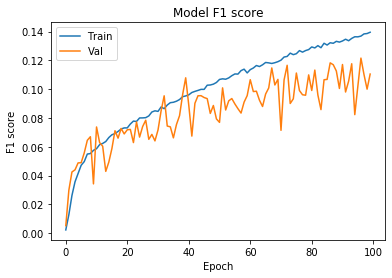

F1 score
           0
0   0.002238
1   0.012859
2   0.026159
3   0.035668
4   0.041423
..       ...
95  0.136387
96  0.136899
97  0.138426
98  0.138682
99  0.139580

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 17us/step
---TEST---
[2.5334986046586088, 0.24502241611480713, 0.10570435971021652]


In [27]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,5,"../music/music/tagged_feature_sets/msd-jmirmfccs_dev/msd-jmirmfccs_dev.csv") 

423
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 33us/step - loss: 3.0273 - accuracy: 0.1087 - f1: 0.0188 - val_loss: 2.9797 - val_accuracy: 0.1274 - val_f1: 0.0419
Epoch 2/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.9104 - accuracy: 0.1415 - f1: 0.0397 - val_loss: 2.9382 - val_accuracy: 0.1374 - val_f1: 0.0620
Epoch 3/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.8480 - accuracy: 0.1577 - f1: 0.0466 - val_loss: 2.8057 - val_accuracy: 0.1679 - val_f1: 0.0474
Epoch 4/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.8165 - accuracy: 0.1645 - f1: 0.0508 - val_loss: 2.7901 - val_accuracy: 0.1668 - val_f1: 0.0536
Epoch 5/100
114915/114915 [==============================] - 4s 37us/step - loss: 2.8102 - accuracy: 0.1659 - f1: 0.0506 - val_loss: 2.7959 - val_accuracy: 0.1692 - val_f1: 0.0596
Epoch 6/100
114915/114915 [==================

114915/114915 [==============================] - 4s 31us/step - loss: 2.6697 - accuracy: 0.1954 - f1: 0.0687 - val_loss: 2.7253 - val_accuracy: 0.1840 - val_f1: 0.0592
Epoch 47/100
114915/114915 [==============================] - 4s 37us/step - loss: 2.6723 - accuracy: 0.1947 - f1: 0.0693 - val_loss: 2.7266 - val_accuracy: 0.1846 - val_f1: 0.0529
Epoch 48/100
114915/114915 [==============================] - 4s 36us/step - loss: 2.6726 - accuracy: 0.1948 - f1: 0.0690 - val_loss: 2.6869 - val_accuracy: 0.1929 - val_f1: 0.0585
Epoch 49/100
114915/114915 [==============================] - 5s 40us/step - loss: 2.6663 - accuracy: 0.1971 - f1: 0.0698 - val_loss: 2.7139 - val_accuracy: 0.1860 - val_f1: 0.0449
Epoch 50/100
114915/114915 [==============================] - 4s 33us/step - loss: 2.6630 - accuracy: 0.1973 - f1: 0.0690 - val_loss: 2.7235 - val_accuracy: 0.1822 - val_f1: 0.0528
Epoch 51/100
114915/114915 [==============================] - 4s 32us/step - loss: 2.6633 - accuracy: 0.1974

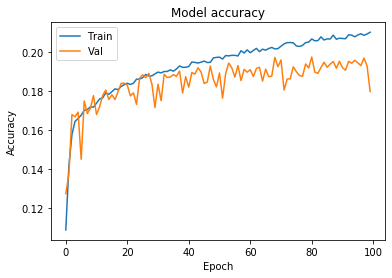

Accuracy
           0
0   0.108741
1   0.141531
2   0.157699
3   0.164452
4   0.165914
..       ...
95  0.208841
96  0.209450
97  0.208641
98  0.209329
99  0.210225

[100 rows x 1 columns]


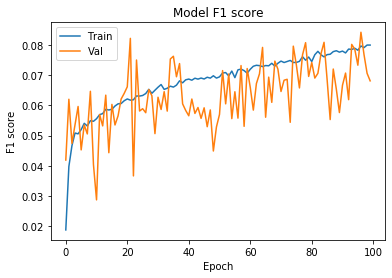

F1 score
           0
0   0.018756
1   0.039735
2   0.046636
3   0.050828
4   0.050558
..       ...
95  0.078240
96  0.079651
97  0.079101
98  0.079954
99  0.079949

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 23us/step
---TEST---
[2.7539625683443205, 0.18117012083530426, 0.06612100452184677]


In [28]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,6,"../music/music/tagged_feature_sets/msd-trh_dev/msd-trh_dev.csv") 

23
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.8170 - accuracy: 0.1562 - f1: 0.0013 - val_loss: 2.7373 - val_accuracy: 0.1696 - val_f1: 0.0083
Epoch 2/100
114915/114915 [==============================] - 4s 33us/step - loss: 2.7082 - accuracy: 0.1829 - f1: 0.0087 - val_loss: 2.6935 - val_accuracy: 0.1830 - val_f1: 0.0153
Epoch 3/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.6789 - accuracy: 0.1914 - f1: 0.0168 - val_loss: 2.6713 - val_accuracy: 0.1887 - val_f1: 0.0072
Epoch 4/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.6598 - accuracy: 0.1964 - f1: 0.0219 - val_loss: 2.6482 - val_accuracy: 0.1961 - val_f1: 0.0240
Epoch 5/100
114915/114915 [==============================] - 4s 35us/step - loss: 2.6467 - accuracy: 0.1999 - f1: 0.0260 - val_loss: 2.6715 - val_accuracy: 0.1881 - val_f1: 0.0208
Epoch 6/100
114915/114915 [===================

114915/114915 [==============================] - 3s 23us/step - loss: 2.4721 - accuracy: 0.2457 - f1: 0.0740 - val_loss: 2.6214 - val_accuracy: 0.2099 - val_f1: 0.0638
Epoch 47/100
114915/114915 [==============================] - 3s 22us/step - loss: 2.4699 - accuracy: 0.2461 - f1: 0.0740 - val_loss: 2.6325 - val_accuracy: 0.2095 - val_f1: 0.0622
Epoch 48/100
114915/114915 [==============================] - 3s 22us/step - loss: 2.4673 - accuracy: 0.2459 - f1: 0.0763 - val_loss: 2.6170 - val_accuracy: 0.2137 - val_f1: 0.0598
Epoch 49/100
114915/114915 [==============================] - 3s 22us/step - loss: 2.4642 - accuracy: 0.2473 - f1: 0.0754 - val_loss: 2.6214 - val_accuracy: 0.2122 - val_f1: 0.0601
Epoch 50/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.4623 - accuracy: 0.2485 - f1: 0.0767 - val_loss: 2.6314 - val_accuracy: 0.2093 - val_f1: 0.0618
Epoch 51/100
114915/114915 [==============================] - 4s 31us/step - loss: 2.4613 - accuracy: 0.2481

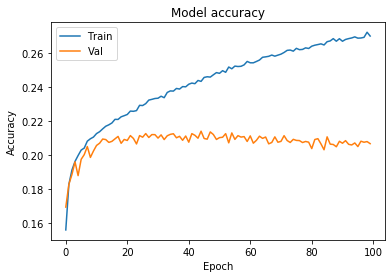

Accuracy
           0
0   0.156194
1   0.182935
2   0.191350
3   0.196397
4   0.199852
..       ...
95  0.268764
96  0.268860
97  0.269242
98  0.272236
99  0.270000

[100 rows x 1 columns]


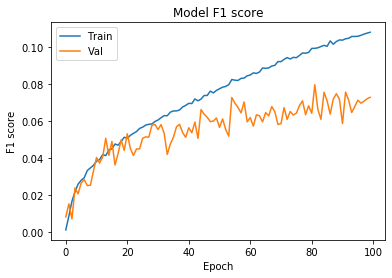

F1 score
           0
0   0.001251
1   0.008742
2   0.016764
3   0.021911
4   0.026004
..       ...
95  0.105983
96  0.106500
97  0.107144
98  0.107674
99  0.108153

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 16us/step
---TEST---
[2.7015068195560037, 0.20731809735298157, 0.07276985049247742]


In [29]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,7,"../music/music/tagged_feature_sets/msd-jmirlpc_dev/msd-jmirlpc_dev.csv") 

63
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.9907 - accuracy: 0.1223 - f1: 0.0248 - val_loss: 2.9192 - val_accuracy: 0.1422 - val_f1: 0.0476
Epoch 2/100
114915/114915 [==============================] - 3s 22us/step - loss: 2.8697 - accuracy: 0.1546 - f1: 0.0426 - val_loss: 2.8941 - val_accuracy: 0.1490 - val_f1: 0.0307
Epoch 3/100
114915/114915 [==============================] - 3s 23us/step - loss: 2.8171 - accuracy: 0.1657 - f1: 0.0452 - val_loss: 2.8663 - val_accuracy: 0.1496 - val_f1: 0.0486
Epoch 4/100
114915/114915 [==============================] - 3s 23us/step - loss: 2.7921 - accuracy: 0.1712 - f1: 0.0496 - val_loss: 2.8225 - val_accuracy: 0.1654 - val_f1: 0.0480
Epoch 5/100
114915/114915 [==============================] - 3s 22us/step - loss: 2.7772 - accuracy: 0.1734 - f1: 0.0521 - val_loss: 2.7813 - val_accuracy: 0.1733 - val_f1: 0.0477
Epoch 6/100
114915/114915 [===================

114915/114915 [==============================] - 3s 24us/step - loss: 2.6342 - accuracy: 0.2058 - f1: 0.0767 - val_loss: 2.6869 - val_accuracy: 0.1941 - val_f1: 0.0679
Epoch 47/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6319 - accuracy: 0.2059 - f1: 0.0764 - val_loss: 2.6836 - val_accuracy: 0.1955 - val_f1: 0.0772
Epoch 48/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6302 - accuracy: 0.2062 - f1: 0.0766 - val_loss: 2.6952 - val_accuracy: 0.1925 - val_f1: 0.0804
Epoch 49/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6284 - accuracy: 0.2067 - f1: 0.0772 - val_loss: 2.6867 - val_accuracy: 0.1927 - val_f1: 0.0718
Epoch 50/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6275 - accuracy: 0.2064 - f1: 0.0773 - val_loss: 2.6997 - val_accuracy: 0.1890 - val_f1: 0.0672
Epoch 51/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6257 - accuracy: 0.2069

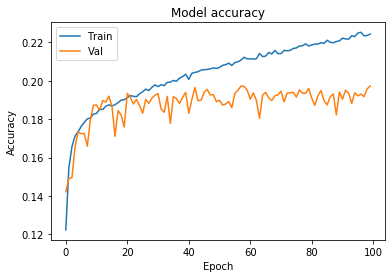

Accuracy
           0
0   0.122343
1   0.154636
2   0.165679
3   0.171170
4   0.173441
..       ...
95  0.224818
96  0.225219
97  0.223356
98  0.223522
99  0.224261

[100 rows x 1 columns]


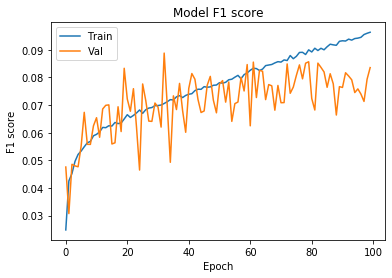

F1 score
           0
0   0.024824
1   0.042555
2   0.045224
3   0.049635
4   0.052135
..       ...
95  0.094220
96  0.094512
97  0.095518
98  0.095972
99  0.096350

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 18us/step
---TEST---
[2.731756462628194, 0.18891148269176483, 0.08104082196950912]


In [30]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,8,"../music/music/tagged_feature_sets/msd-rh_dev_new/msd-rh_dev_new.csv") 

99
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 4s 35us/step - loss: 2.8027 - accuracy: 0.1518 - f1: 0.0049 - val_loss: 2.7125 - val_accuracy: 0.1688 - val_f1: 0.0178
Epoch 2/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.6683 - accuracy: 0.1832 - f1: 0.0159 - val_loss: 2.6419 - val_accuracy: 0.1894 - val_f1: 0.0259
Epoch 3/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6272 - accuracy: 0.1939 - f1: 0.0250 - val_loss: 2.6279 - val_accuracy: 0.1919 - val_f1: 0.0202
Epoch 4/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.6000 - accuracy: 0.2009 - f1: 0.0307 - val_loss: 2.6400 - val_accuracy: 0.1940 - val_f1: 0.0161
Epoch 5/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.5849 - accuracy: 0.2052 - f1: 0.0339 - val_loss: 2.5899 - val_accuracy: 0.2035 - val_f1: 0.0273
Epoch 6/100
114915/114915 [===================

114915/114915 [==============================] - 3s 28us/step - loss: 2.4038 - accuracy: 0.2555 - f1: 0.0939 - val_loss: 2.4924 - val_accuracy: 0.2379 - val_f1: 0.0947
Epoch 47/100
114915/114915 [==============================] - 4s 35us/step - loss: 2.3982 - accuracy: 0.2573 - f1: 0.0949 - val_loss: 2.5053 - val_accuracy: 0.2350 - val_f1: 0.0659
Epoch 48/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.3994 - accuracy: 0.2558 - f1: 0.0966 - val_loss: 2.5150 - val_accuracy: 0.2337 - val_f1: 0.0998
Epoch 49/100
114915/114915 [==============================] - 3s 24us/step - loss: 2.3978 - accuracy: 0.2568 - f1: 0.0963 - val_loss: 2.5406 - val_accuracy: 0.2271 - val_f1: 0.0680
Epoch 50/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.3955 - accuracy: 0.2589 - f1: 0.0962 - val_loss: 2.5317 - val_accuracy: 0.2299 - val_f1: 0.0721
Epoch 51/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.3906 - accuracy: 0.2607

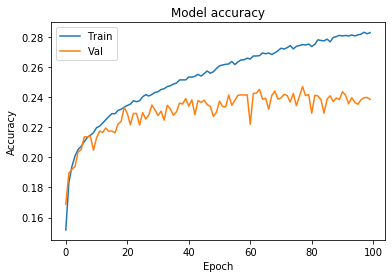

Accuracy
           0
0   0.151764
1   0.183240
2   0.193917
3   0.200870
4   0.205178
..       ...
95  0.281269
96  0.281704
97  0.283027
98  0.282026
99  0.282783

[100 rows x 1 columns]


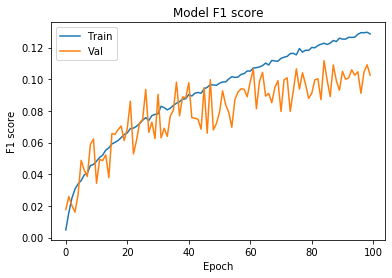

F1 score
           0
0   0.004879
1   0.015947
2   0.024992
3   0.030699
4   0.033896
..       ...
95  0.128365
96  0.129397
97  0.129360
98  0.129669
99  0.128591

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 19us/step
---TEST---
[2.5433745937523216, 0.2377822995185852, 0.10514093190431595]


In [32]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,9,"../music/music/tagged_feature_sets/msd-jmirderivatives_dev/msd-jmirderivatives_dev.csv") 

127
Train on 114915 samples, validate on 28729 samples
Epoch 1/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.6853 - accuracy: 0.1921 - f1: 0.0544 - val_loss: 2.5839 - val_accuracy: 0.2156 - val_f1: 0.0652
Epoch 2/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.5378 - accuracy: 0.2280 - f1: 0.0791 - val_loss: 2.5229 - val_accuracy: 0.2330 - val_f1: 0.0600
Epoch 3/100
114915/114915 [==============================] - 3s 26us/step - loss: 2.4881 - accuracy: 0.2413 - f1: 0.0887 - val_loss: 2.4575 - val_accuracy: 0.2504 - val_f1: 0.0779
Epoch 4/100
114915/114915 [==============================] - 3s 27us/step - loss: 2.4552 - accuracy: 0.2508 - f1: 0.0953 - val_loss: 2.4437 - val_accuracy: 0.2501 - val_f1: 0.1047
Epoch 5/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.4356 - accuracy: 0.2556 - f1: 0.0987 - val_loss: 2.4282 - val_accuracy: 0.2567 - val_f1: 0.1201
Epoch 6/100
114915/114915 [==================

114915/114915 [==============================] - 3s 27us/step - loss: 2.2001 - accuracy: 0.3169 - f1: 0.1786 - val_loss: 2.3393 - val_accuracy: 0.2823 - val_f1: 0.1493
Epoch 47/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.1947 - accuracy: 0.3187 - f1: 0.1800 - val_loss: 2.3562 - val_accuracy: 0.2817 - val_f1: 0.1479
Epoch 48/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.1949 - accuracy: 0.3194 - f1: 0.1815 - val_loss: 2.3406 - val_accuracy: 0.2886 - val_f1: 0.1732
Epoch 49/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.1922 - accuracy: 0.3202 - f1: 0.1821 - val_loss: 2.3488 - val_accuracy: 0.2847 - val_f1: 0.1600
Epoch 50/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.1888 - accuracy: 0.3199 - f1: 0.1829 - val_loss: 2.3302 - val_accuracy: 0.2910 - val_f1: 0.1631
Epoch 51/100
114915/114915 [==============================] - 3s 25us/step - loss: 2.1872 - accuracy: 0.3202

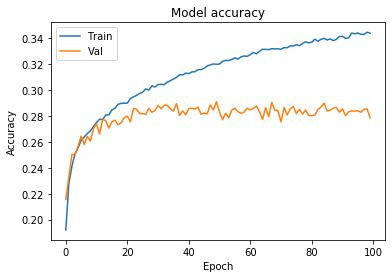

Accuracy
           0
0   0.192064
1   0.227951
2   0.241291
3   0.250759
4   0.255615
..       ...
95  0.344072
96  0.343062
97  0.342993
98  0.344672
99  0.343932

[100 rows x 1 columns]


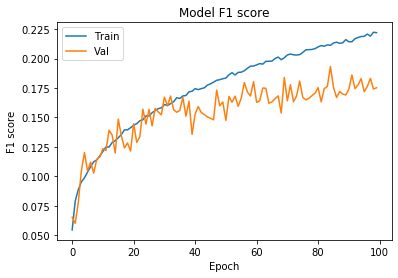

F1 score
           0
0   0.054434
1   0.079052
2   0.088722
3   0.095275
4   0.098665
..       ...
95  0.218927
96  0.220806
97  0.219118
98  0.222389
99  0.222033

[100 rows x 1 columns]
35911/35911 [==============================] - 1s 21us/step
---TEST---
[2.416593338937237, 0.27818775177001953, 0.17293477058410645]


In [33]:
K.clear_session()
# Avec les paramètres par défaut donnés dans l'ennoncé
CreateMultiPerceptron(4,100,100,0.0005,10,"../music/music/tagged_feature_sets/msd-marsyas_dev_new/msd-marsyas_dev_new.csv") 

In [27]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5],[6]])
c = np.concatenate((a, b), axis=1)

In [28]:
b.shape

(2, 1)

In [29]:
a.shape

(2, 2)

In [30]:
c

array([[1, 2, 5],
       [3, 4, 6]])